# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

<hr>

## Loading the .csv dataset from GitHub

In [1]:
import pandas as pd

In [2]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features and el target: `Graduado` that has a binary values={Si, No}.

Usted puede, y debe, usar mas data que esta disponible para construir su modelo. Los siguientes archivos .csv presentados:

In [3]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head()

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [4]:
for j in range(115):
    primer=''
    numero=0
    for i in df_orden_materias.columns[1:]:
        if df_orden_materias.loc[j,i]!='Sin clase' and numero==0:
            primer=df_orden_materias.loc[j,i]
            numero=1
            df_orden_materias.loc[j,i]=numero
            continue
        
        if df_orden_materias.loc[j,i]==primer:
            numero=1
            df_orden_materias.loc[j,i]=numero
        elif (numero>=1) and (df_orden_materias.loc[j,i]!='Sin clase'):
            numero=numero+1
            df_orden_materias.loc[j,i]=numero
        
            
        

In [5]:
df_orden_materias=df_orden_materias.replace('Sin clase',0)

In [6]:
df_orden_materias.max(axis=1).sort_values(axis=0)

106     1
83      2
23      2
55      2
52      2
       ..
58      7
56      9
34     13
103    16
53     16
Length: 115, dtype: int64

In [7]:
#materias_T=df_orden_materias.transpose()

In [8]:
#materias_T=materias_T.iloc[1:,:]

In [9]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#for i in range(115):
#    le.fit(materias_T.iloc[:,i])
#    materias_T.iloc[:,i]=le.transform(materias_T.iloc[:,i])

In [10]:
#df_orden_materias.iloc[:,1:]=materias_T.transpose()

In [11]:
#df_orden_materias.head()

In [12]:
materias=pd.melt(df_orden_materias,id_vars=df_orden_materias.columns[0],value_vars=list(df_orden_materias.columns[1:]))

In [13]:
materias.head()

,reducido,variable,value
0,Act. Derecho Contratual,2017 - 03,0
1,Adm. Emp.,2017 - 03,0
2,Adm. Riesgos,2017 - 03,0
3,Adm. Salud,2017 - 03,0
4,Admon Fin.,2017 - 03,0


In [14]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
df_tabla_conexiones.head()

,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85


In [15]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
df_tabla_tareas.head()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0


Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        
Observe que la variable ``studentId`` aparece en varias tablas.

Usted puede combinar/merge estos datasets como usted desee.

In [16]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


In [17]:
df_base_for_training[(df_base_for_training.Graduado=='Si') & (df_base_for_training.reducido=='Neuromarketing')]

,studentId,reducido,ciclo,Graduado
17,70566.0,Neuromarketing,2019 - 01,Si
130,71811.0,Neuromarketing,2019 - 01,Si
192,81400.0,Neuromarketing,2019 - 05,Si
304,70602.0,Neuromarketing,2019 - 01,Si
476,69045.0,Neuromarketing,2018 - 08,Si
559,81433.0,Neuromarketing,2019 - 06,Si
587,82294.0,Neuromarketing,2019 - 06,Si
1159,71029.0,Neuromarketing,2019 - 01,Si
1260,70420.0,Neuromarketing,2019 - 01,Si
1288,70526.0,Neuromarketing,2019 - 01,Si


In [18]:
df_base_for_training.studentId

0       88588.0
1       81135.0
2       80926.0
3       82415.0
4       90082.0
         ...   
2495    89685.0
2496    77590.0
2497    57623.0
2498    50018.0
2499    88250.0
Name: studentId, Length: 2500, dtype: float64

#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [19]:
df_base_for_training.tail()

,studentId,reducido,ciclo,Graduado
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No
2499,88250.0,Prof. Deportiva.,2019 - 08,No


In [20]:
df_tabla_tareas.tail()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0
6297,71859.0,2019 - 02,87.333000,10.0,0.0,0.0,10.0


In [21]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0


In [77]:

df2 = pd.merge(
    df2, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df2.tail()

,studentId,reducido,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
995,91291.0,Trastornos Alimen.,2019 - 08,0.000,0.0,12.0,0.0,12.0
996,91312.0,Marca Personal,2019 - 08,76.580,5.0,0.0,0.0,5.0
997,91329.0,Adm. Salud,2019 - 08,86.410,13.0,0.0,0.0,13.0
998,91345.0,Direc. Proy.,2019 - 08,0.000,0.0,9.0,0.0,9.0
999,91437.0,Des. Neg. y Empren.,2019 - 08,75.024,15.0,0.0,0.0,15.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reducido               2500 non-null   int32  
 1   Graduado               2500 non-null   object 
 2   Calificacion_Promedio  2500 non-null   float64
 3   Tareas_Puntuales       2500 non-null   float64
 4   Tareas_No_Entregadas   2500 non-null   float64
 5   Tareas_Retrasadas      2500 non-null   float64
 6   Total_Tareas           2500 non-null   float64
 7   Dias_Conectado         2500 non-null   float64
 8   Minutos_Promedio       2500 non-null   float64
 9   Minutos_Total          2500 non-null   float64
 10  value                  2500 non-null   int64  
 11  ratio_puntuales        2500 non-null   float64
 12  ratio_no_entregadas    2500 non-null   float64
 13  ratio_retrasadas       2500 non-null   float64
 14  puntaje_total          2500 non-null   float64
 15  punt

In [23]:
df=pd.merge(
df,df_tabla_conexiones,how='inner',
on=['studentId','ciclo'])

In [79]:
df2=pd.merge(
df2,df_tabla_conexiones,how='inner',
on=['studentId','ciclo'])

In [24]:
# Información acerca de las columnas del dataset unido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
 9   Dias_Conectado         2500 non-null   float64
 10  Minutos_Promedio       2500 non-null   float64
 11  Minutos_Total          2500 non-null   float64
dtypes: float64(9), object(3)
memory usage: 253.9+ KB


In [25]:
df=pd.merge(
df,materias,how='inner',
left_on=['reducido','ciclo'],right_on=['reducido','variable']
)

In [80]:
df2=pd.merge(
df2,materias,how='inner',
left_on=['reducido','ciclo'],right_on=['reducido','variable']
)

In [26]:
df=df.drop(columns=['variable'])

In [81]:
df2=df2.drop(columns=['variable'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
 9   Dias_Conectado         2500 non-null   float64
 10  Minutos_Promedio       2500 non-null   float64
 11  Minutos_Total          2500 non-null   float64
 12  value                  2500 non-null   int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 273.4+ KB


De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando el dataset antes de entrenar

### Borrando finlas con valores NaN

Usando el metodo Pandas DataFrame.dropna() usted puede remover todas las filas que estan indefinidas para la columna ``Graduado``.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [28]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación DropNA: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de la transformación DropNA: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
value                    0
dtype: int64



In [82]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación DropNA: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación DropNA: 

studentId                0
reducido                 0
ciclo                    0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
value                    0
dtype: int64



In [29]:
# Aplicando la función para borrar todas las filas con valor NaN en la columna ``Graduado``:
df2 = df.dropna(axis='index', how='any', subset=['Graduado'])

In [30]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (SimpleImputer) (df_data_3)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
value                    0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los otros valores NaN vamos a usar como **ejemplo** la sustitución por la constante 0. 

Usted puede escoger cualquier estrategia que crea que es la mejor para esto :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [31]:
from sklearn.impute import SimpleImputer
import numpy as np


# Creando un objeto ``SimpleImputer``
impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='constant',  # La estrategia escogida es reemplazar por una constante
    fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)

In [32]:
# Visualizando los datos faltantes del dataset antes de la segunda transformación (df_data_2)
print("Valores nulos antes de transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

# Aplicar la transformación ``SimpleImputer`` en el conjunto de datos base
impute_zeros.fit(X=df)

# Reconstrucción del nuevo DataFrame Pandas (df_data_3)
df = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df
    ),  # El resultado SimpleImputer.transfor(<<pandas dataframe>>) es una lista de listas
    columns=df.columns  # Las columnas originals deben ser conservadas en esta transformación
)

# Visualizndo los datos faltantes del dataset 
print("Valores nulos del dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
value                    0
dtype: int64

Valores nulos del dataset despues de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
value                    0
dtype: int64



### Eliminando columnas no desadas

Vamos a **demostrar** acontinuación como usar el metodo DataFrame.drop().

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [33]:
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,value
2495,90194.0,Edu. Primaria,2019 - 08,No,34.616154,8.0,4.0,1.0,13.0,65.0,168.867846,10976.41,4
2496,90286.0,Inn. Diseno Edu.,2019 - 08,No,75.666000,9.0,1.0,0.0,10.0,32.0,270.669375,8661.42,1
2497,90945.0,Inn. Diseno Edu.,2019 - 08,Si,97.000000,10.0,0.0,0.0,10.0,80.0,257.695875,20615.67,1
2498,90312.0,Mkt. Farmaceutico A.,2019 - 08,Si,77.142857,13.0,1.0,0.0,14.0,61.0,368.980164,22507.79,5
2499,90599.0,Inn. Negocios,2019 - 08,No,72.000000,14.0,1.0,0.0,15.0,56.0,290.476071,16266.66,4


In [34]:
df['ratio_puntuales']=df.Tareas_Puntuales/df.Total_Tareas
df['ratio_no_entregadas']=df.Tareas_No_Entregadas/df.Total_Tareas
df['ratio_retrasadas']=df.Tareas_Retrasadas/df.Total_Tareas
df['puntaje_total']=df.Calificacion_Promedio*df.Total_Tareas
df['puntaje_conexiones']=df.Calificacion_Promedio*df.Dias_Conectado

In [83]:
df2['ratio_puntuales']=df2.Tareas_Puntuales/df2.Total_Tareas
df2['ratio_no_entregadas']=df2.Tareas_No_Entregadas/df2.Total_Tareas
df2['ratio_retrasadas']=df2.Tareas_Retrasadas/df2.Total_Tareas
df2['puntaje_total']=df2.Calificacion_Promedio*df2.Total_Tareas
df2['puntaje_conexiones']=df2.Calificacion_Promedio*df2.Dias_Conectado

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
 9   Dias_Conectado         2500 non-null   float64
 10  Minutos_Promedio       2500 non-null   float64
 11  Minutos_Total          2500 non-null   float64
 12  value                  2500 non-null   int64  
 13  ratio_puntuales        2500 non-null   float64
 14  ratio_no_entregadas    2500 non-null   float64
 15  rati

In [36]:
df = df.drop(columns=['studentId'], inplace=False)

In [84]:
df2 = df2.drop(columns=['studentId'], inplace=False)

In [37]:
df.tail()

,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,value,ratio_puntuales,ratio_no_entregadas,ratio_retrasadas,puntaje_total,puntaje_conexiones
2495,Edu. Primaria,2019 - 08,No,34.616154,8.0,4.0,1.0,13.0,65.0,168.867846,10976.41,4,0.615385,0.307692,0.076923,450.01,2250.050000
2496,Inn. Diseno Edu.,2019 - 08,No,75.666000,9.0,1.0,0.0,10.0,32.0,270.669375,8661.42,1,0.900000,0.100000,0.000000,756.66,2421.312000
2497,Inn. Diseno Edu.,2019 - 08,Si,97.000000,10.0,0.0,0.0,10.0,80.0,257.695875,20615.67,1,1.000000,0.000000,0.000000,970.00,7760.000000
2498,Mkt. Farmaceutico A.,2019 - 08,Si,77.142857,13.0,1.0,0.0,14.0,61.0,368.980164,22507.79,5,0.928571,0.071429,0.000000,1080.00,4705.714286
2499,Inn. Negocios,2019 - 08,No,72.000000,14.0,1.0,0.0,15.0,56.0,290.476071,16266.66,4,0.933333,0.066667,0.000000,1080.00,4032.000000


### Manejando variables Categoricas

Como se menciono antes, los computadores no son buenos con las variables categoricas.

Mientras que nosotros entendemos bien las variables categoricas, es debido a un conocimiento previo quie el computador no tiene.

La mayoria de tecnicas de Machine Learning y modelso trabajan con un set limitado de datos (Tipicamente binario). 

Las redes neurales consumenda data y producen resultados en el rango de 0..1 t raramente van mas alla del alcance.

En resumen, la gran mayoria de algoritmos de machine learning aceptan data de entrada  ("training data") de donde los features son extraidos.

Basado en estos features, un modelo matematico es creado, el cual es usado para hacer una predicción o decision sin ser programado explicitamente para esa tarea.

Dado un dataset con con 2 features, vamos a dejar que encoder encuentre los valores unicos por features y transforme la data a binario usando la tecnica one-hot encoding.

In [38]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
#df3 = pd.get_dummies(df2, columns=['ciclo'])
#df3.tail()

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.reducido)
c=le.transform(df.reducido)
#le.fit(df.value)
#d=le.transform(df.value)


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df2.reducido)
c=le.transform(df2.reducido)
#le.fit(df.value)
#d=le.transform(df.value)

In [40]:
df['anio_ciclo']=df.ciclo.str.split('-').str[0].astype('int')
df['mes_ciclo']=df.ciclo.str.split('-').str[1].astype('int')

In [86]:
df2['anio_ciclo']=df2.ciclo.str.split('-').str[0].astype('int')
df2['mes_ciclo']=df2.ciclo.str.split('-').str[1].astype('int')

In [41]:
df['reducido']=c
#df['value']=d

In [87]:
df2['reducido']=c
#df['value']=d

In [42]:
df=df.drop(columns=['ciclo'])

In [88]:
df2=df2.drop(columns=['ciclo'])

In [43]:
df.head()

,reducido,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,value,ratio_puntuales,ratio_no_entregadas,ratio_retrasadas,puntaje_total,puntaje_conexiones,anio_ciclo,mes_ciclo
0,66,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,1,0.866667,0.133333,0.0,983.98,2099.157333,2017,3
1,66,No,76.641333,13.0,2.0,0.0,15.0,30.0,691.944667,20758.34,1,0.866667,0.133333,0.0,1149.62,2299.240000,2017,3
2,61,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,1,1.000000,0.000000,0.0,778.34,4324.111111,2017,3
3,61,No,76.852222,9.0,0.0,0.0,9.0,18.0,295.809444,5324.57,1,1.000000,0.000000,0.0,691.67,1383.340000,2017,3
4,61,No,84.815556,9.0,0.0,0.0,9.0,15.0,324.121333,4861.82,1,1.000000,0.000000,0.0,763.34,1272.233333,2017,3


In [44]:
df.mes_ciclo.hist(by=df['Graduado'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002435BC86668>,
      dtype=object)

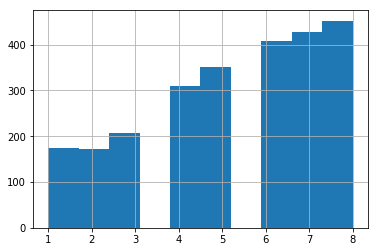

In [45]:
df.mes_ciclo.hist()

c1

## Entrenando un clasificador basado  en un Árbol de Decisión

### Seleccionando FEATURES y definiendo la variable TARGET

In [46]:
#df3.columns
columnas=df.columns

In [581]:
from sklearn.preprocessing import StandardScaler
le.fit(df['Graduado'])
df['Graduado']=le.transform(df['Graduado'])
sc=StandardScaler()
sc.fit(df)
df=sc.transform(df)
df=pd.DataFrame(df,columns=columnas)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [47]:
#features = df3[
#    [
#        'studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
#        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
#        'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
#        'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
#        'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
#        'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
#        'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
#        'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
#        'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
#        'ciclo_2019 - 08'
#    ]
#]
features = df[[x for x in df.columns if x != 'Graduado']]
target = df['Graduado']  ## No cambie la variable target!

In [48]:
features = df[[x for x in df.columns if x not in ['Graduado']]]

### Dividiendo nuestro dataset en set de Entrenamiento y Pruebas

In [49]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

In [585]:
import lightgbm as lgbm

### Entrenando un modelo ``DecisionTreeClassifier()``

In [50]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

#dtc = DecisionTreeClassifier(max_depth=16,random_state=123).fit(X_train, y_train)
#dtc = RandomForestClassifier(random_state=123)
#dtc=lgbm.LGBMClassifier()
dtc=LogisticRegression()


In [52]:
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
scores=[]
for i in range(1,18):
    #dtc = RandomForestClassifier(random_state=123,criterion='entropy',n_jobs=-1,n_estimators=300)
    #dtc=lgbm.LGBMClassifier(random_state=123,n_estimators=50,learning_rate=0.3,max_depth=6)
    #dtc=DecisionTreeClassifier(max_depth=3,random_state=123)
    #dtc=LogisticRegression(random_state=123)
    dtc=ExtraTreesClassifier(random_state=123,n_estimators=47,max_depth=11,max_features='auto')
    selector = RFE(dtc, n_features_to_select=i, step=1)
    X_train2 = selector.fit_transform(X_train, y_train)
    dtc = RandomForestClassifier(random_state=123).fit(X_train2, y_train)
    y_pred = dtc.predict(X_test[X_test.columns[selector.support_]])
    le.fit(y_test)
    scores.append(f1_score(le.transform(y_test),le.transform(y_pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [55]:
from sklearn.model_selection import GridSearchCV
dtc=ExtraTreesClassifier(random_state=123,n_estimators=10,max_depth=10)
selector = RFE(dtc, n_features_to_select=5, step=1)
X_train2 = selector.fit_transform(X_train, y_train)
dtc = RandomForestClassifier(random_state=123).fit(X_train2, y_train)
y_pred = dtc.predict(X_test[X_test.columns[selector.support_]])
le.fit(y_test)
f1_score(le.transform(y_test),le.transform(y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8014842300556587

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
X_test.columns[selector.support_]
random_grid={'n_estimators':[1000],
            'max_depth':[1,2,10],
            'max_features':['auto','sqrt','log2']}
random_search=GridSearchCV(estimator = dtc, param_grid = random_grid, 
                                 cv = 3, verbose=3,n_jobs = -1)
#random_grid={'n_estimators':list(range(20,700,1)),
#            'max_depth':list(range(2,30,1)),
#            'max_features':['auto','sqrt','log2']}
#random_search=RandomizedSearchCV(estimator = dtc, param_distributions = random_grid, 
#                                 cv = 3, n_iter=1000,verbose=3,n_jobs = -1)
random_search=GridSearchCV(estimator = dtc, param_grid = random_grid, 
                                 cv = 3, verbose=3,n_jobs = -1)
random_search.fit(X_train[X_train.columns[selector.support_]],y_train)
random_search.best_params_
dtc=random_search.best_estimator_
y_pred = dtc.predict(X_test[X_test.columns[selector.support_]])
le.fit(y_test)
f1_score(le.transform(y_test),le.transform(y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:    7.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    8.5s finished


0.8747855917667239

In [73]:
random_search.best_params_

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 1000}

In [62]:
X_train.columns[selector.support_]

Index(['Calificacion_Promedio', 'Dias_Conectado', 'ratio_puntuales',
       'ratio_no_entregadas', 'puntaje_conexiones'],
      dtype='object')

In [ ]:
Extra tree {'max_depth': 7, 'max_features': 'auto', 'n_estimators': 150} 12 features:0.8625429553264605
Ectra tree {'max_depth': 11, 'max_features': 'auto', 'n_estimators': 47} 12 features 0.8380281690140845

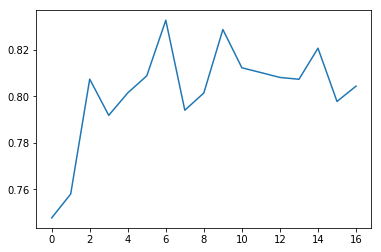

In [723]:
plt.plot(scores)

In [724]:
scores

[0.7476979742173112,
 0.7579737335834895,
 0.8074074074074075,
 0.79182156133829,
 0.8014842300556587,
 0.8088235294117647,
 0.8327272727272728,
 0.7940074906367042,
 0.801457194899818,
 0.8287292817679559,
 0.8122743682310469,
 0.8102189781021897,
 0.8081180811808119,
 0.8073394495412846,
 0.8207024029574861,
 0.7977941176470588,
 0.8043875685557587]

In [725]:
max(scores)
#scores.arg_max()

0.8327272727272728

In [673]:
Decision tree depth 3, 13 variables

SyntaxError: invalid syntax (<ipython-input-673-dad4bac17e00>, line 1)

In [374]:
X_train2.shape

(2000, 17)

In [231]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier


#dtc = DecisionTreeClassifier(max_depth=15,random_state=123).fit(X_train2, y_train)
dtc = RandomForestClassifier(random_state=123).fit(X_train2, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [232]:
X_test[X_test.columns[selector.support_]]

,reducido,Calificacion_Promedio,Dias_Conectado,Minutos_Promedio,Minutos_Total,ratio_puntuales,ratio_no_entregadas,puntaje_total,puntaje_conexiones,mes_ciclo
1555,28,63.667000,29.0,332.921379,9654.72,0.900000,0.100000,636.67,1846.343000,5
915,4,94.642667,141.0,449.418511,63368.01,1.000000,0.000000,1419.64,13344.616000,3
210,66,92.592222,139.0,274.542158,38161.36,1.000000,0.000000,833.33,12870.318889,1
829,4,12.762000,6.0,801.935000,4811.61,0.200000,0.800000,191.43,76.572000,2
47,47,95.667000,28.0,83.333571,2333.34,1.000000,0.000000,956.67,2678.676000,5
...,...,...,...,...,...,...,...,...,...,...
2094,47,98.000000,132.0,169.395909,22360.26,1.000000,0.000000,980.00,12936.000000,7
1330,60,76.666667,69.0,129.429565,8930.64,1.000000,0.000000,920.00,5290.000000,4
1998,40,81.889167,66.0,352.147576,23241.74,0.916667,0.083333,982.67,5404.685000,7
393,30,93.888889,35.0,289.648000,10137.68,1.000000,0.000000,845.00,3286.111111,6


Haciendo predicciones del Sample Test

In [233]:
y_pred = dtc.predict(X_test[X_test.columns[selector.support_]])
print(y_pred)

['No' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'Si'
 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si'
 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'Si'
 'No' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si'
 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No'
 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si'
 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No'
 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si'
 'No' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No'
 'No' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'No' 'Si'
 'Si' 

### Analice la calidad del modelo a través de la matriz de confusión

In [234]:
#!pip install seaborn --upgrade

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.796\nPrecision=0.824\nRecall=0.800\nF1 Score=0.8118081180811808')

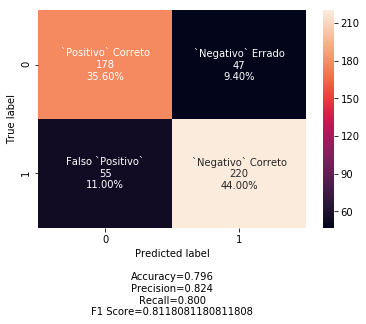

In [235]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

Feature: reducido, Score: 0.053541237981877786
Feature: Calificacion_Promedio, Score: 0.17696236207457108
Feature: Tareas_Puntuales, Score: 0.025399377046268448
Feature: Tareas_No_Entregadas, Score: 0.0019294290644420332
Feature: Tareas_Retrasadas, Score: 0.0004965183591393254
Feature: Total_Tareas, Score: 0.009541625948477789
Feature: Dias_Conectado, Score: 0.39518207153356916
Feature: Minutos_Promedio, Score: 0.07547573194182858
Feature: Minutos_Total, Score: 0.07417813818372782
Feature: value, Score: 0.02907925342676342
Feature: ratio_puntuales, Score: 0.026375418251583158
Feature: ratio_no_entregadas, Score: 0.011311599736421159
Feature: ratio_retrasadas, Score: 0.006481757196022754
Feature: puntaje_total, Score: 0.059990561151359374
Feature: anio_ciclo, Score: 0.013716224287942688
Feature: mes_ciclo, Score: 0.040338693816005404


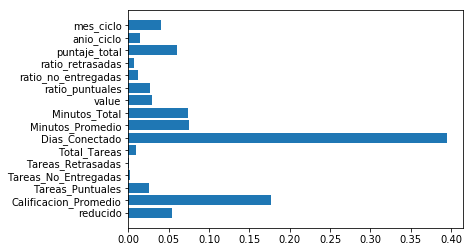

In [58]:
importance = dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: {}, Score: {}'.format(features.columns[i],v))
# plot feature importance
plt.barh([x for x in features.columns], importance)
plt.show()

<hr>

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [76]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df2 = pd.read_csv(r'ToBePredicted.csv')
df2.tail()

,studentId,reducido,ciclo
995,79594.0,Diagn. Psicoped.,2019 - 05
996,69470.0,Ventas Estrat.,2018 - 08
997,72921.0,Big Data,2019 - 02
998,80608.0,Interv. Psicoped,2019 - 05
999,86966.0,Interv. Psicoped,2019 - 07


In [ ]:
# Uniendo los dataset
df = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

# Eliminando la columna 'reducido'
df2 = df.drop(columns=['reducido'], inplace=False)

# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
df3 = pd.get_dummies(df2, columns=['ciclo'])
df3.tail()

Observando los features declarados acontinuación, sabemos que el dataset ha ser evaluado esta en el mismo formato usado para entrenar nuestro árbol de decisión anteriormente.

```features = df3[
    [
        'studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
        'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
        'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
        'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
        'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
        'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
        'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
        'ciclo_2019 - 08'
    ]
]
target = df3['Graduado']  ## No cambie la variable target!```

In [89]:
y_pred = dtc.predict(df2[X_test.columns[selector.support_]])
print(y_pred)

['No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No'
 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'Si' 'No' 'No'
 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si'
 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si'
 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si'
 'No' 'Si' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si'
 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si'
 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'No' 'No' 'No'
 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si'
 'No' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No'
 'Si' 

### Guardando los resultados de la predicción en un archivo csv

In [90]:
np.savetxt("results.csv", y_pred, delimiter=",", fmt='%s')

In [91]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

NameError: name 'project' is not defined

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
